In [1]:
# Author: Riley Owens (GitHub: mrileyowens)

# This program computes the equivalent width
# of a Lyα profile.

In [2]:
import sys

import numpy as np
#np.set_printoptions(threshold=sys.maxsize)

import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100
plt.rcParams['lines.linewidth']=0.5

from scipy.optimize import curve_fit

from lmfit.models import SkewedGaussianModel

In [3]:
def lin_interp(x, y, i, cont):
    return x[i] + (x[i+1] - x[i]) * ((cont - y[i]) / (y[i+1] - y[i]))

def bounds(x,y,cont,w):
    
    signs = np.sign(np.add(y, -cont))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    wZeros=np.take(x,zero_crossings_i)
    b1=wZeros[wZeros <= w][-1]
    b2=wZeros[wZeros >= w][0]
    
    return [lin_interp(x, y, zero_crossings_i[0], cont),
            lin_interp(x, y, zero_crossings_i[1], cont)],b1,b2

def cont(wArr,fArr,Min,Max):
    
    fArr=fArr[wArr > Min]
    wArr=wArr[wArr > Min]
    fArr=fArr[wArr < Max]
    wArr=wArr[wArr < Max]
    
    cont=np.mean(fArr)
    
    return cont
    
def ew(wArr,fArr,Min,Max,cont):
    
    fArr=fArr[wArr > Min]
    wArr=wArr[wArr > Min]
    fArr=fArr[wArr < Max]
    wArr=wArr[wArr < Max]
    
    ew=abs(np.trapz(1.0-np.divide(fArr,cont),wArr))
    
    return ew

In [4]:
# Establishing directories and filepaths
home='C://Users/15136/OneDrive - University of Cincinnati/Documents/Research/sunburstarc'
data=home+'/data/spectra/mage'
figs=home+'/figs'

spectra=data+'/planckarc_pos1-comb1_MWdr.txt'

In [5]:
# Computing Lyα wavelength in the moving-frame
redshift=2.37067
w=1215.67*(redshift+1)

In [6]:
# Setting plot labels
title='Slit 1'
wlabel='Wavelength (Å)'
ylabel='Flux (10$^{-27}$ erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$)'

In [7]:
#Converting .txt file into a data frame
dataFrame=pd.read_csv(spectra,delimiter='\t',header=0,skiprows=13)

#Discarding missing data
dataFrame=dataFrame.apply(pd.to_numeric,errors='coerce').dropna()

#Discarding extreme outliers
dataFrame=dataFrame[dataFrame.iloc[:,1]<1e-20]

#Resetting the index
dataFrame=dataFrame.reset_index(drop=True)

# Extracting wavelength, flux, and noise
wArr=dataFrame.iloc[:,0].to_numpy()
fArr=dataFrame.iloc[:,1].to_numpy()
nArr=dataFrame.iloc[:,2].to_numpy()

Text(0, 0.5, 'Flux (10$^{-27}$ erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$)')

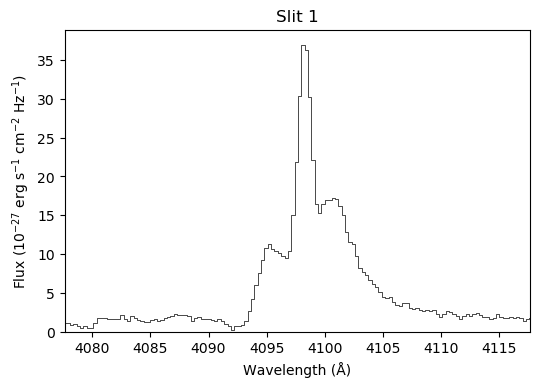

In [8]:
# Plotting moving-frame spectrum
plt.close('all')
fig,ax=plt.subplots(1,1)

plt.plot(wArr,fArr*1e27,color='black',drawstyle='steps-mid')
ax.set_xlim(w-20.0,w+20.0)
ax.set_ylim(0.0)
plt.title(title)
ax.set_xlabel(wlabel)
ax.set_ylabel(ylabel)

In [9]:
# Computing the nearby continuum level
cont=cont(wArr,fArr*1e27,4081.0,4086.0)

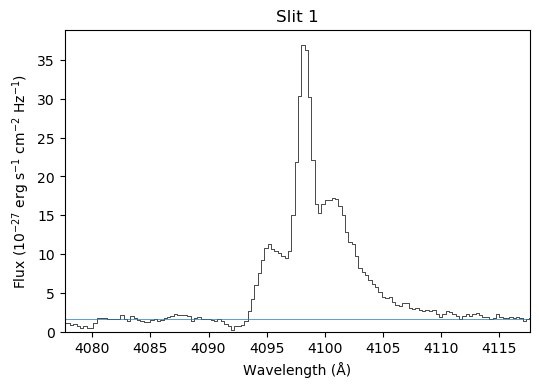

In [10]:
# Plotting the Lyα profile with the continuum fit
plt.close('all')
fig,ax=plt.subplots(1,1)

plt.plot(wArr,fArr*1e27,color='black',drawstyle='steps-mid')
ax.set_xlim(w-20.0,w+20.0)
ax.set_ylim(0.0)
plt.title(title)
ax.set_xlabel(wlabel)
ax.set_ylabel(ylabel)
ax.axhline(cont)

In [11]:
# Computing the EW integration bounds
d,b1,b2=bounds(wArr,fArr*1e27,cont,w)

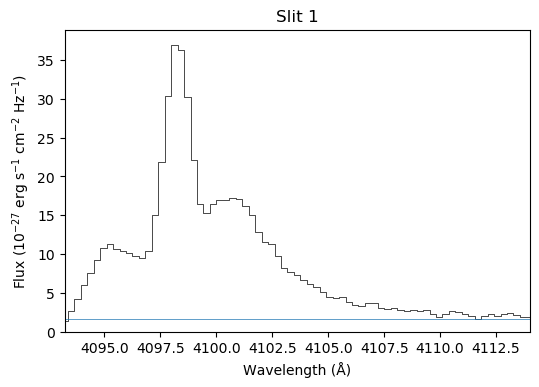

In [12]:
# Plotting the Lyα profile with the continuum fit on the 
# derived integration bounds
plt.close('all')
fig,ax=plt.subplots(1,1)

plt.plot(wArr,fArr*1e27,color='black',drawstyle='steps-mid')
ax.set_xlim(b1,b2)
ax.set_ylim(0.0)
plt.title(title)
ax.set_xlabel(wlabel)
ax.set_ylabel(ylabel)
ax.axhline(cont)

In [13]:
# Computing the EW
ew=ew(wArr,fArr*1e27,b1,b2,cont)
print(ew)

93.58568605607879
